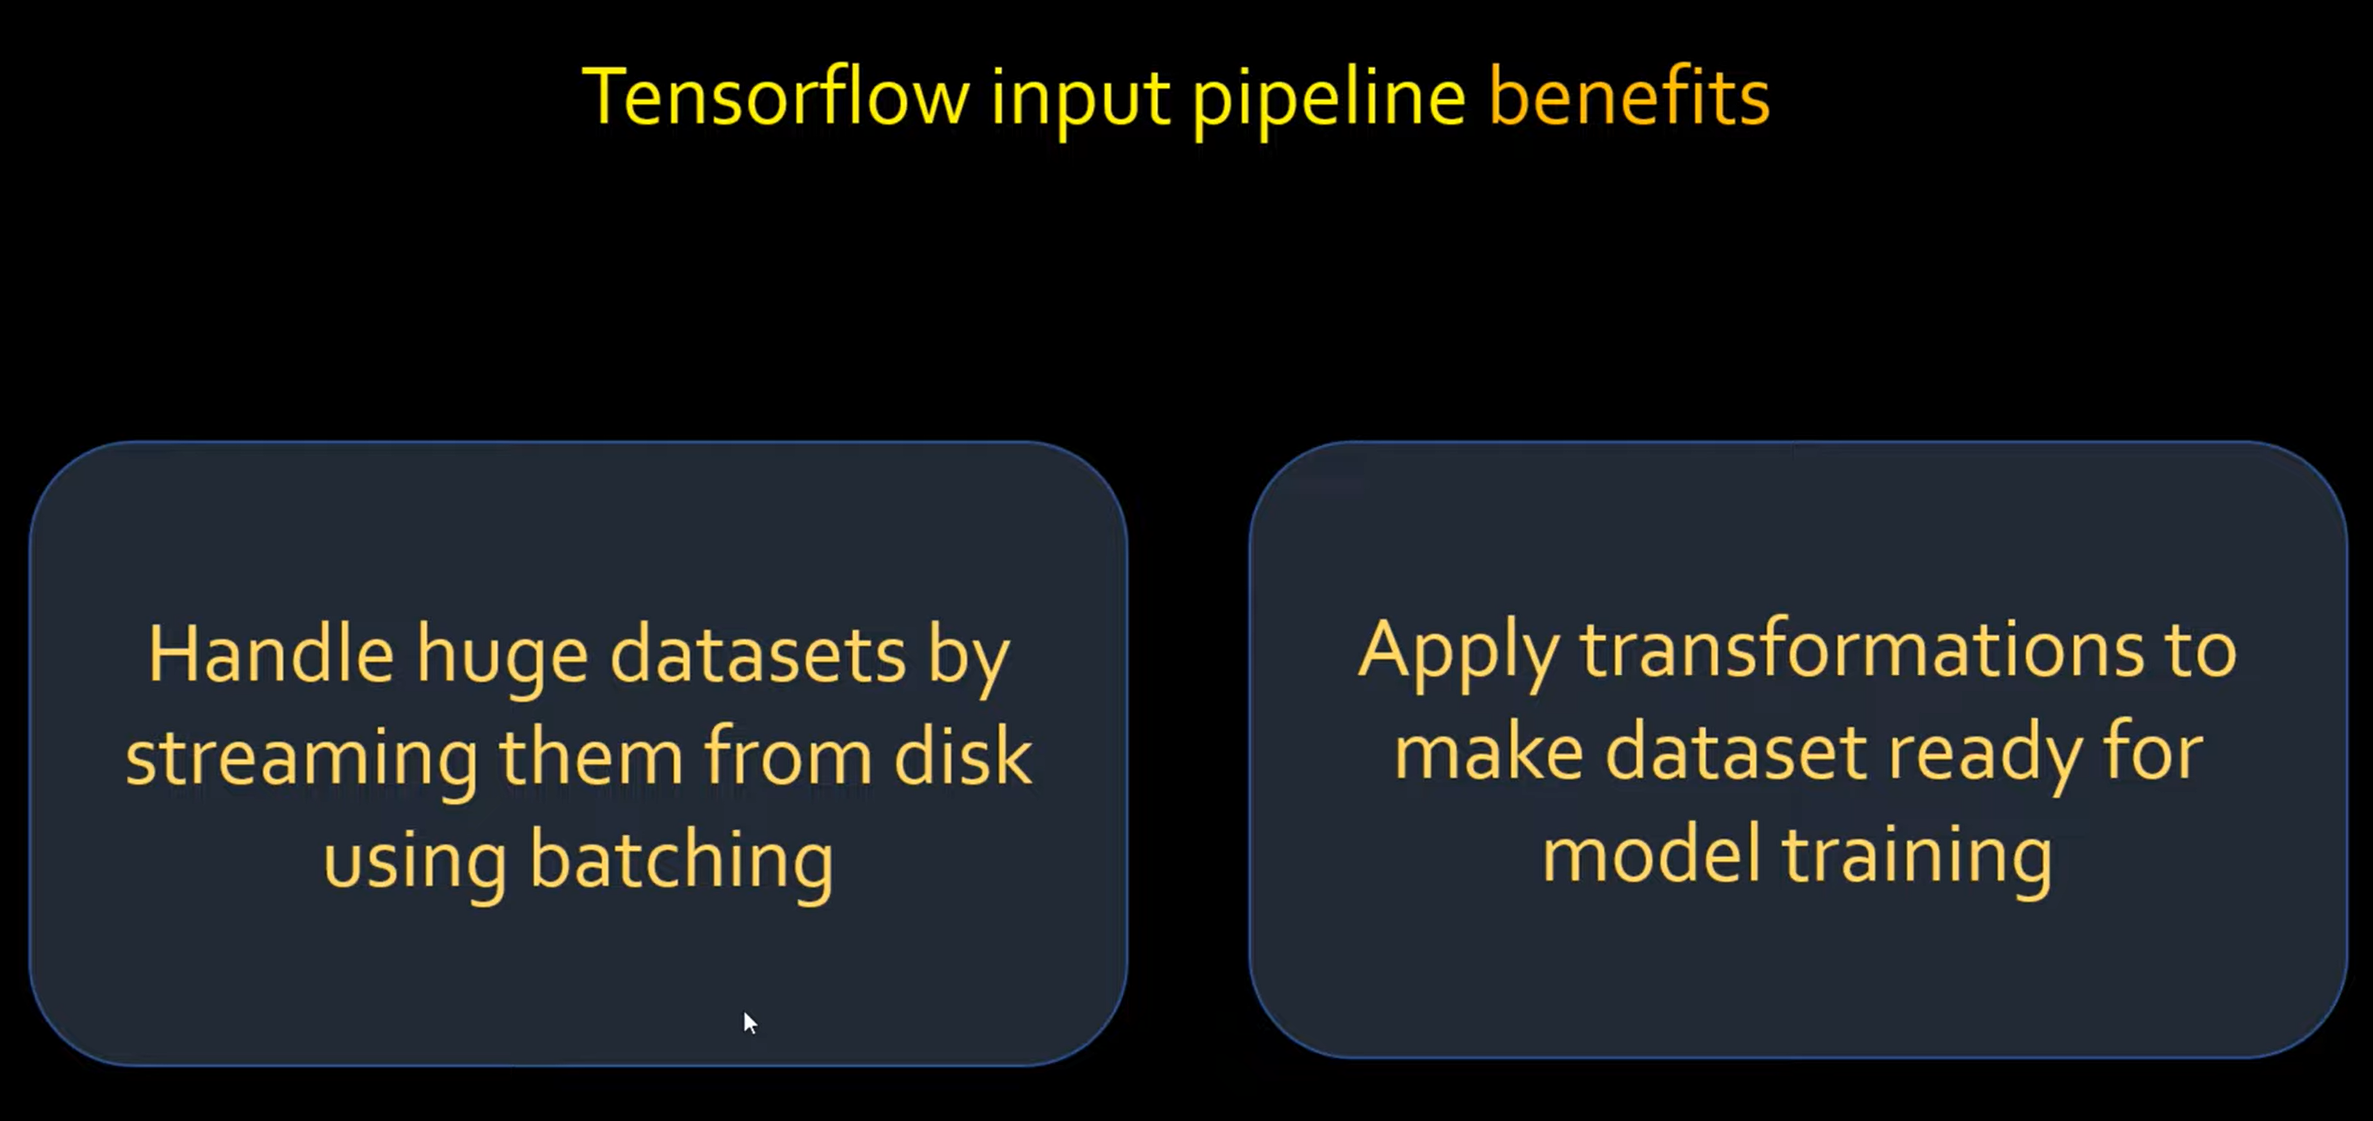

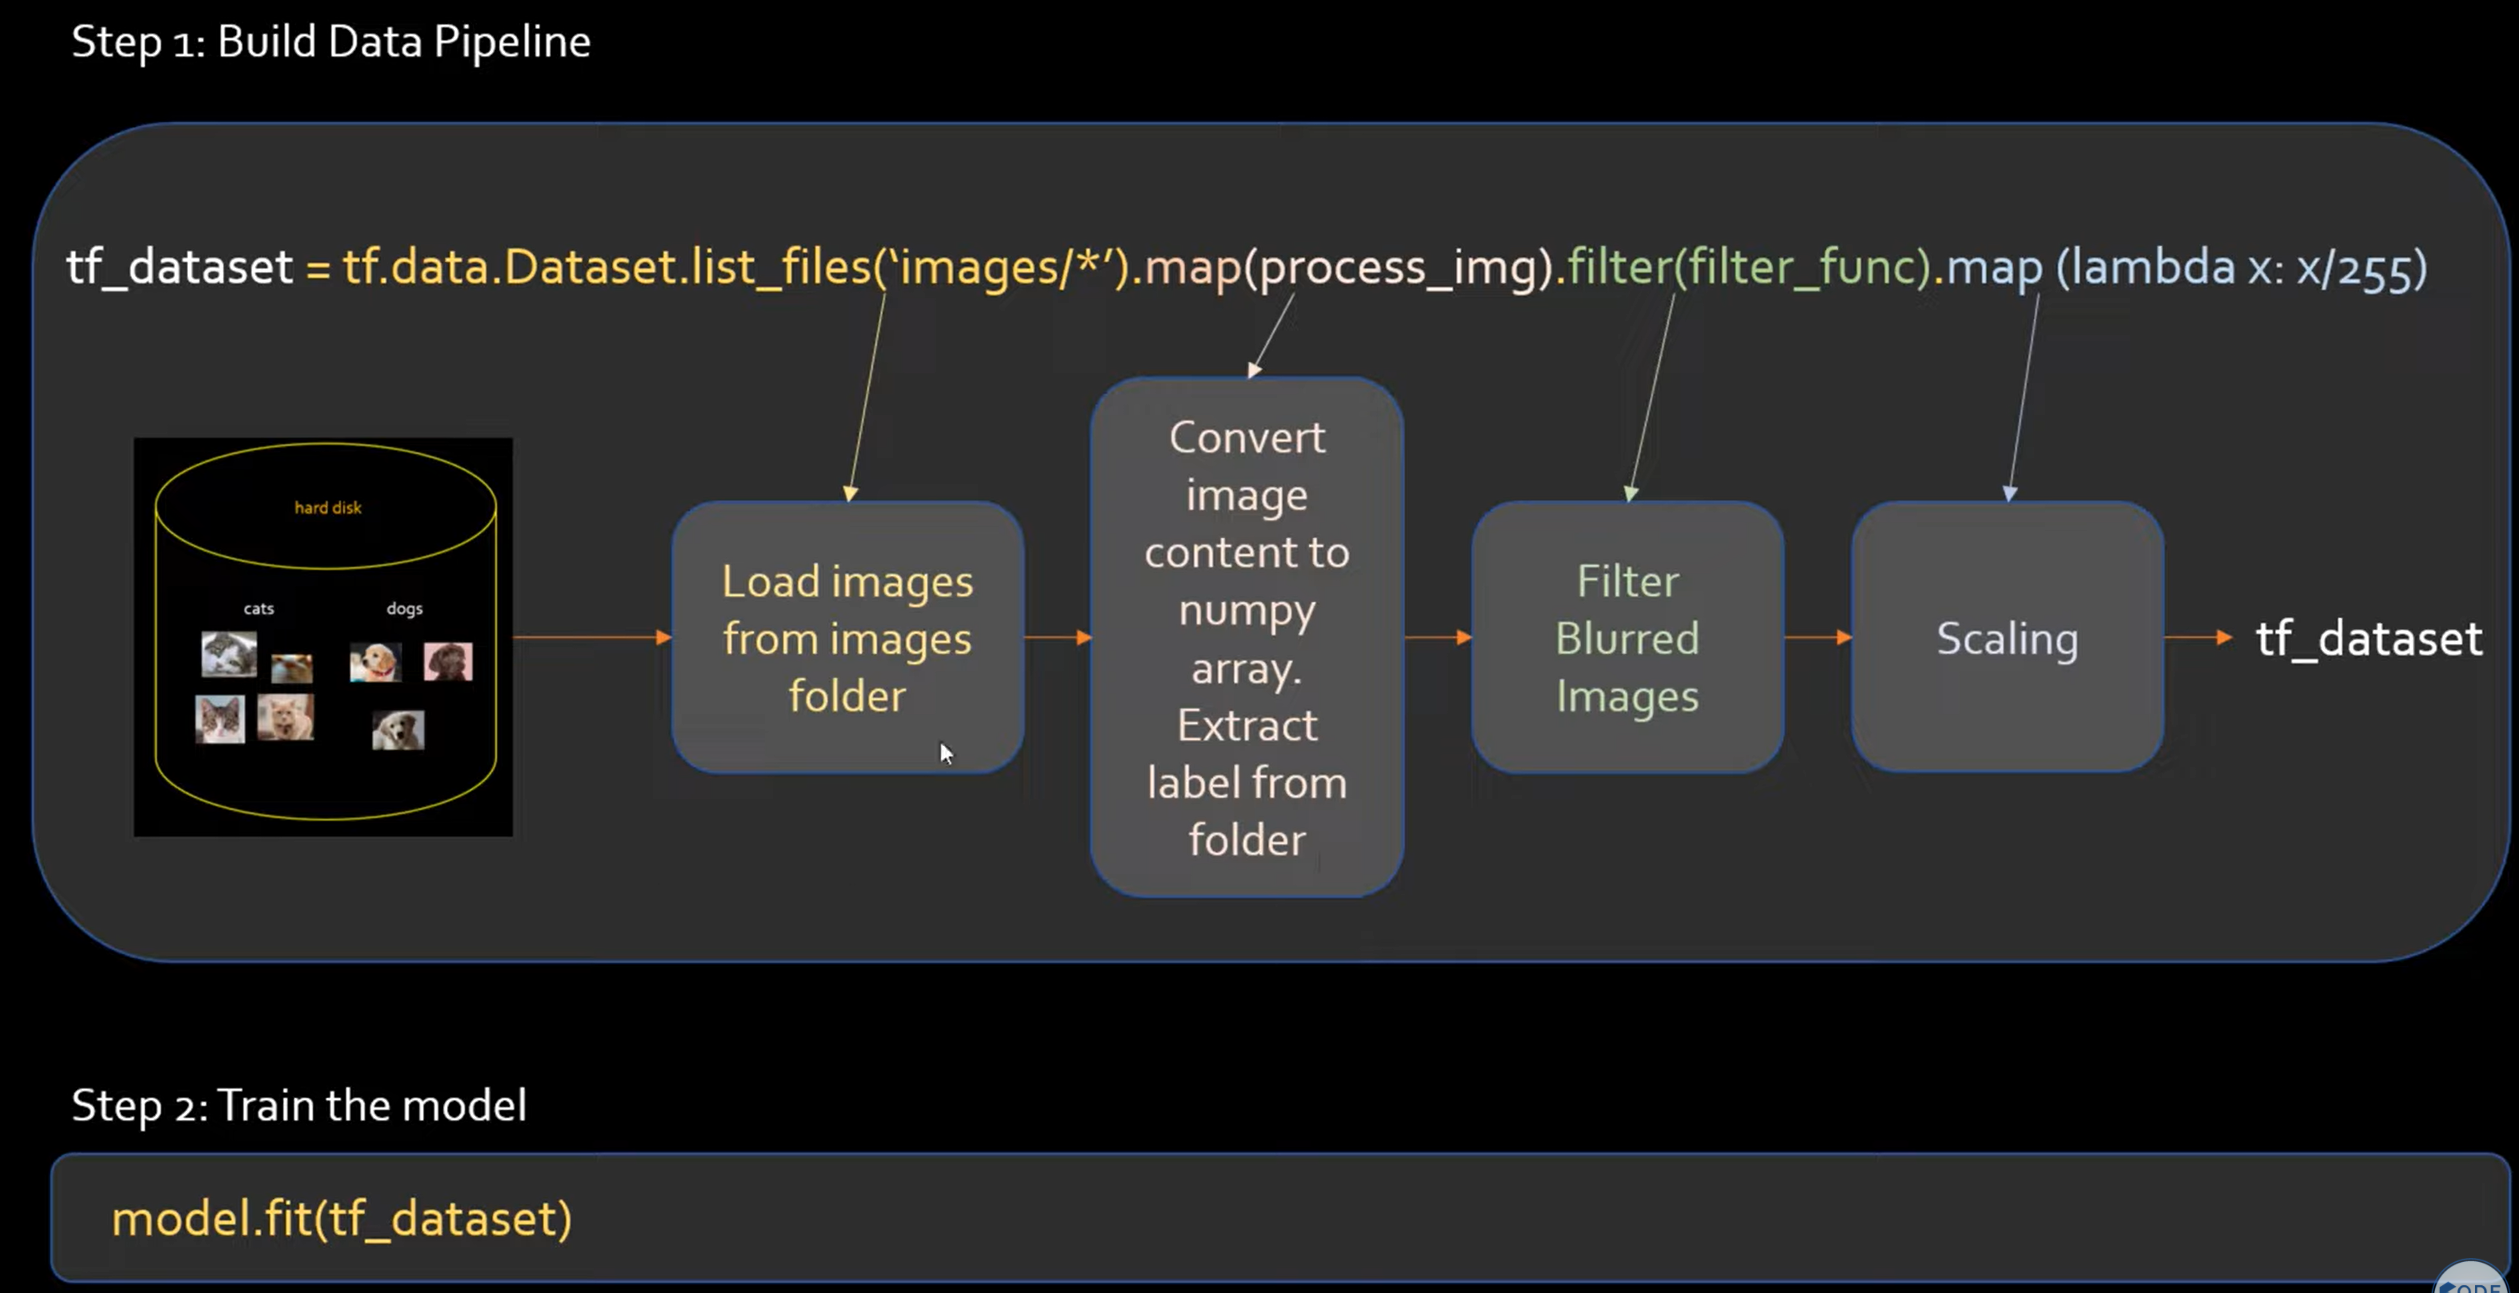

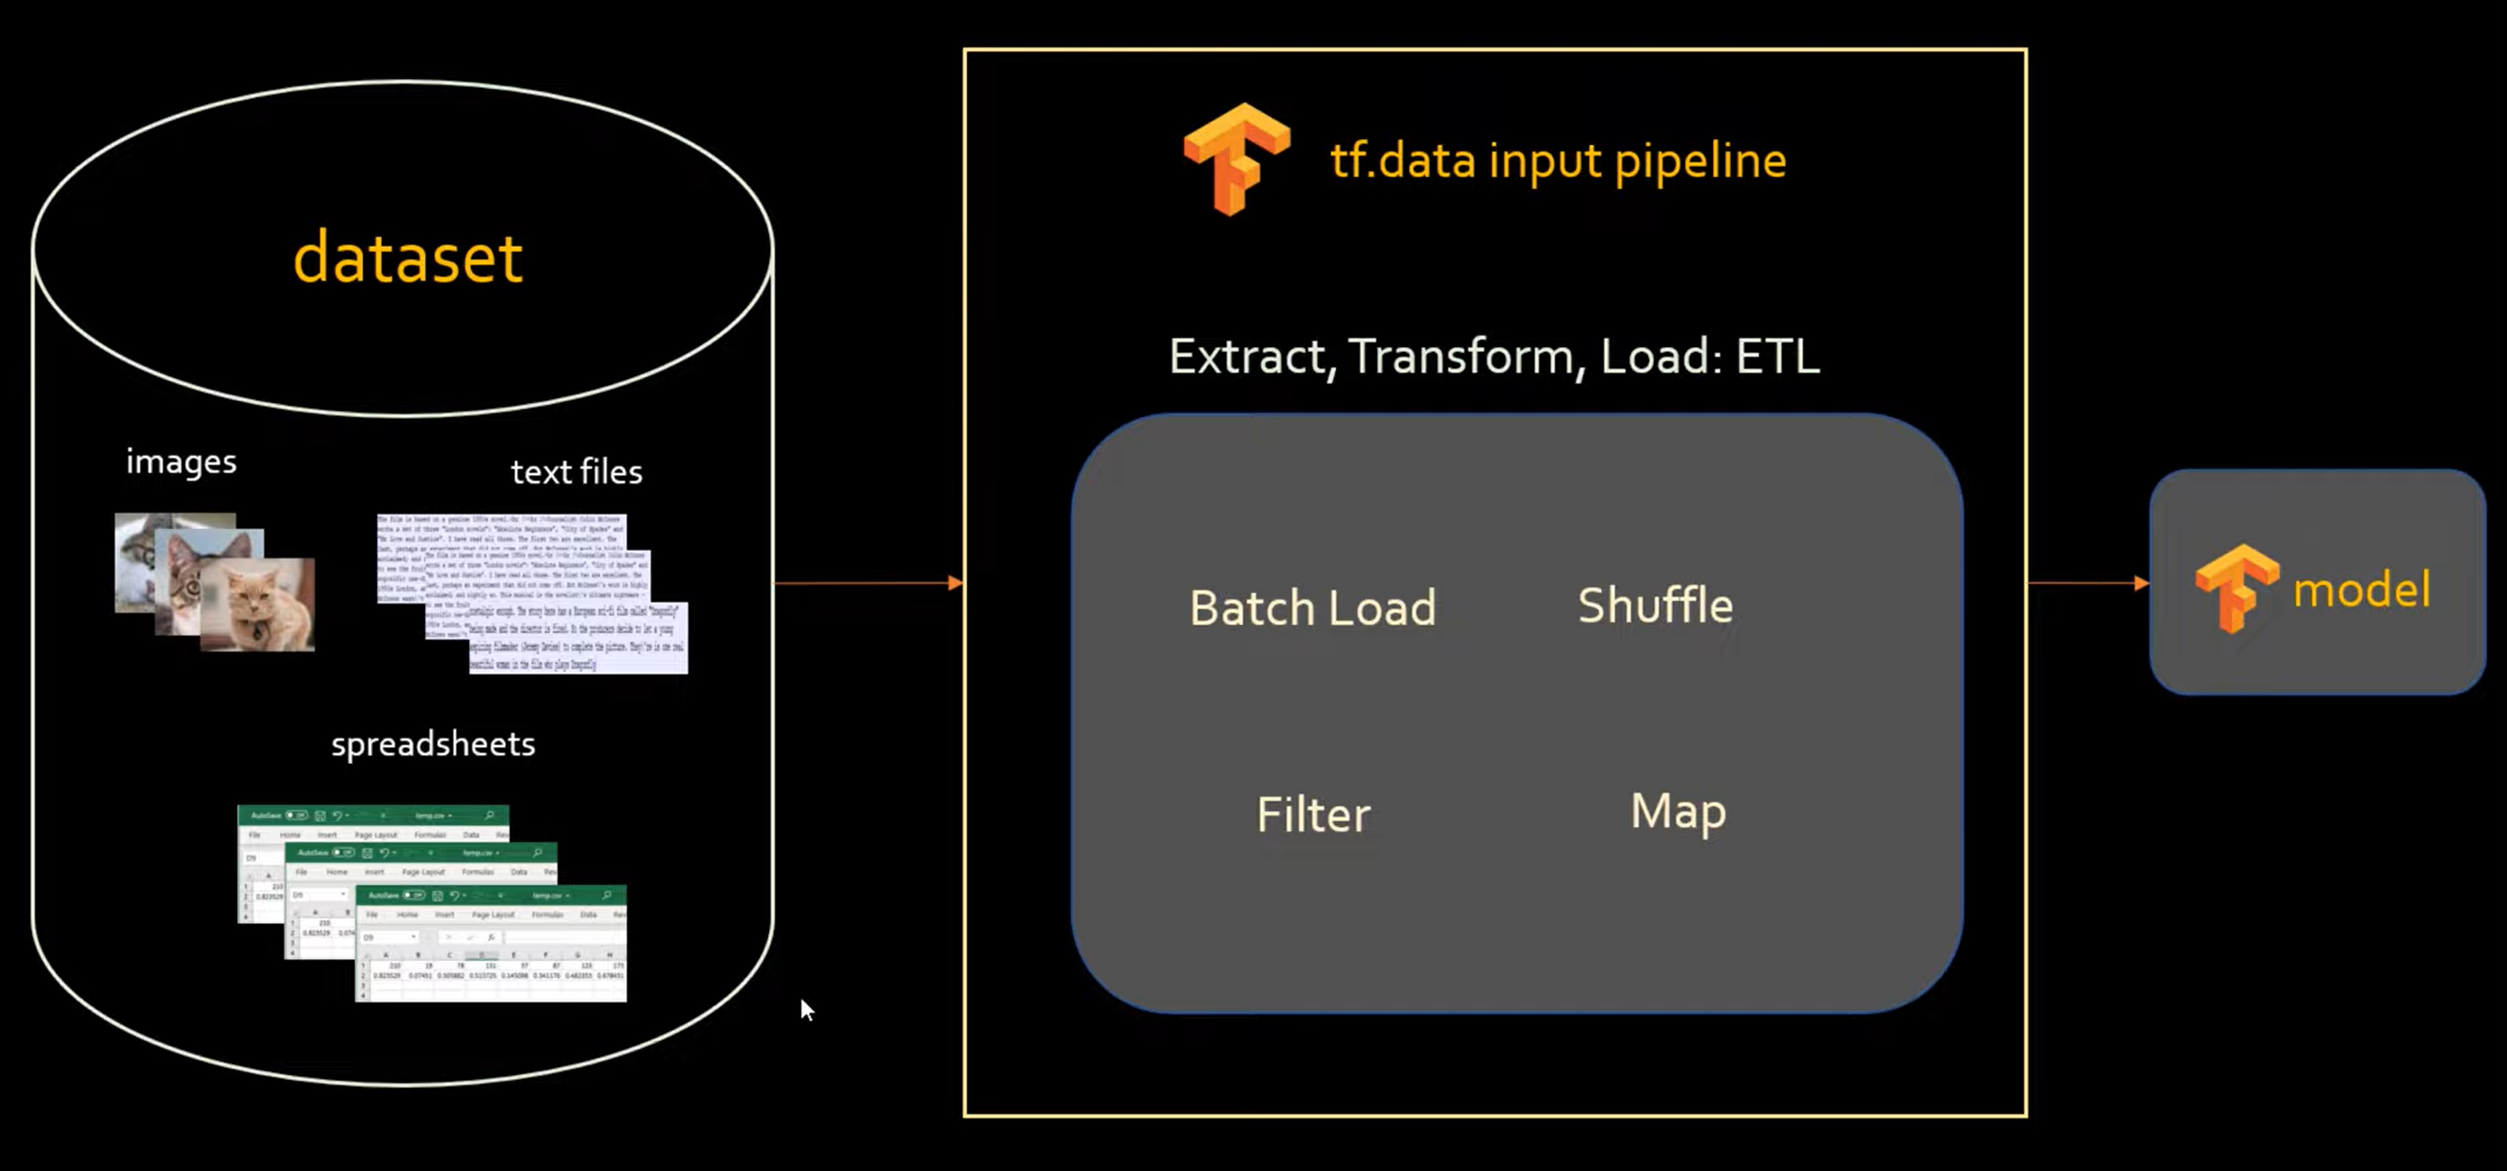

In [1]:
import tensorflow as tf

Create tf dataset from a list

In [2]:
daily_sales_numbers = [21, 22, -108, 31, -1, 32, 34,31]

tf_dataset = tf.data.Dataset.from_tensor_slices(daily_sales_numbers)
tf_dataset

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

Iterate through tf dataset

In [6]:
for sales in tf_dataset:
    print(sales.numpy())

21
22
-108
31
-1
32
34
31


Iterate through elements as numpy elements

In [8]:
for sales in tf_dataset.as_numpy_iterator():
    print(sales)

21
22
-108
31
-1
32
34
31


Iterate through first n elements in tf dataset

In [9]:
for sales in tf_dataset.take(3):
    print(sales.numpy())

21
22
-108


Filter sales numbers that are < 0

In [10]:
tf_dataset = tf_dataset.filter(lambda x : x>0)
for sales in tf_dataset.as_numpy_iterator():
    print(sales)

21
22
31
32
34
31


Convert sales numbers from USA dollars ($) to Pakistani Rupees (PKR) Assuming 1->277 conversation rate

In [11]:
tf_dataset = tf_dataset.map(lambda x : x*277)
for sales in tf_dataset.as_numpy_iterator():
    print(sales)

5817
6094
8587
8864
9418
8587


Shuffe

In [12]:
tf_dataset = tf_dataset.shuffle(2)
for sales in tf_dataset.as_numpy_iterator():
    print(sales)

5817
6094
8864
9418
8587
8587


How shuffling works

https://stackoverflow.com/questions/53514495/what-does-batch-repeat-and-shuffle-do-with-tensorflow-dataset

Batching

In [13]:
for sales_batch in tf_dataset.batch(2):
    print(sales_batch.numpy())

[5817 6094]
[8864 9418]
[8587 8587]


Perform all of the above operations in one shot

In [15]:
tf_dataset = tf.data.Dataset.from_tensor_slices(daily_sales_numbers)

tf_dataset = tf_dataset.filter(lambda x:x>0).map(lambda y:y*277).shuffle(2).batch(2)
for sales in tf_dataset.as_numpy_iterator():
    print(sales)

[6094 5817]
[8587 9418]
[8587 8864]


Images

In [20]:
images_ds = tf.data.Dataset.list_files('images/*/*', shuffle=False)

for file in images_ds.take(3):
    print(file.numpy())

b'images\\cat\\pexels-photo-1022158.jpeg'
b'images\\cat\\pexels-photo-1025111.jpeg'
b'images\\cat\\pexels-photo-1031460.jpeg'


In [21]:
image_count = len(images_ds)
image_count

305

In [22]:
type(images_ds)

tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset

In [25]:
images_ds = images_ds.shuffle(200)
for file in images_ds.take(3):
    print(file.numpy())

b'images\\dog\\pexels-photo-1078090.jpeg'
b'images\\cat\\pexels-photo-596135.jpeg'
b'images\\cat\\pexels-photo-1084425.jpeg'


In [26]:
class_names = ["cat","dog"]

In [27]:
train_size = int(image_count*0.8)
train_ds = images_ds.take(train_size)
test_ds = images_ds.skip(train_size)

In [28]:
len(train_ds)

244

In [29]:
len(test_ds)

61

In [31]:
s = 'images\\dog\\pexels-photo-1078090.jpeg'
s.split("\\")[-2]

'dog'

In [32]:
def get_label(file_path):
    import os
    parts = tf.strings.split(file_path, os.path.sep)
    return parts[-2]

In [33]:
get_label('images\\dog\\pexels-photo-1078090.jpeg')

<tf.Tensor: shape=(), dtype=string, numpy=b'dog'>

In [35]:
for label in train_ds.map(get_label):
    print(label)

tf.Tensor(b'cat', shape=(), dtype=string)
tf.Tensor(b'cat', shape=(), dtype=string)
tf.Tensor(b'dog', shape=(), dtype=string)
tf.Tensor(b'dog', shape=(), dtype=string)
tf.Tensor(b'cat', shape=(), dtype=string)
tf.Tensor(b'dog', shape=(), dtype=string)
tf.Tensor(b'cat', shape=(), dtype=string)
tf.Tensor(b'cat', shape=(), dtype=string)
tf.Tensor(b'cat', shape=(), dtype=string)
tf.Tensor(b'cat', shape=(), dtype=string)
tf.Tensor(b'cat', shape=(), dtype=string)
tf.Tensor(b'cat', shape=(), dtype=string)
tf.Tensor(b'dog', shape=(), dtype=string)
tf.Tensor(b'cat', shape=(), dtype=string)
tf.Tensor(b'cat', shape=(), dtype=string)
tf.Tensor(b'cat', shape=(), dtype=string)
tf.Tensor(b'cat', shape=(), dtype=string)
tf.Tensor(b'dog', shape=(), dtype=string)
tf.Tensor(b'dog', shape=(), dtype=string)
tf.Tensor(b'dog', shape=(), dtype=string)
tf.Tensor(b'cat', shape=(), dtype=string)
tf.Tensor(b'cat', shape=(), dtype=string)
tf.Tensor(b'cat', shape=(), dtype=string)
tf.Tensor(b'cat', shape=(), dtype=

In [34]:
def process_image(file_path):
    label = get_label(file_path)
    img = tf.io.read_file(file_path) # load the raw data from the file as a string
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, [128, 128])
    return img, label

In [39]:
img, label = process_image('images\\dog\\pexels-photo-1078090.jpeg')
img.numpy()[:2]

array([[[177.      , 167.      , 156.09375 ],
        [172.      , 161.28125 , 148.5625  ],
        [170.6914  , 156.89453 , 141.16016 ],
        [175.17188 , 159.      , 143.      ],
        [175.34247 , 158.04645 , 140.12457 ],
        [170.13837 , 142.16962 , 121.23212 ],
        [169.68341 , 130.01154 ,  95.667786],
        [175.6778  , 126.084045,  75.69342 ],
        [180.03131 , 128.03131 ,  68.62506 ],
        [176.28516 , 124.28516 ,  67.28516 ],
        [174.97687 , 121.97687 ,  67.97687 ],
        [184.73828 , 132.73828 ,  74.73828 ],
        [182.5664  , 130.5664  ,  72.56641 ],
        [174.08722 , 121.08722 ,  67.08722 ],
        [164.23126 , 111.23126 ,  61.231262],
        [168.05182 , 115.05182 ,  63.05182 ],
        [171.10052 , 118.100525,  66.006775],
        [180.71875 , 127.82422 ,  73.50781 ],
        [184.      , 132.      ,  73.78906 ],
        [188.67188 , 136.67188 ,  78.671875],
        [189.15625 , 135.87805 ,  76.782776],
        [188.56671 , 132.56671 ,  

In [41]:
train_ds = train_ds.map(process_image)
test_ds = test_ds.map(process_image)

In [42]:
for image, label in train_ds.take(1):
    print("****",image)
    print("****",label)

**** tf.Tensor(
[[[124.90625  137.90625  145.90625 ]
  [128.       141.       149.      ]
  [127.       140.       148.      ]
  ...
  [143.26562  156.26562  162.26562 ]
  [142.       155.       161.      ]
  [139.80078  152.80078  160.80078 ]]

 [[124.90625  137.90625  145.90625 ]
  [128.       141.       149.      ]
  [127.       140.       148.      ]
  ...
  [144.40234  157.40234  163.40234 ]
  [143.       156.       162.      ]
  [142.18231  157.18231  164.18231 ]]

 [[124.90625  137.90625  145.90625 ]
  [128.       141.       149.      ]
  [127.       140.       148.      ]
  ...
  [145.00104  158.00104  164.00104 ]
  [144.       157.       163.      ]
  [140.       157.       164.      ]]

 ...

 [[ 47.539062  39.53125   28.535156]
  [ 30.28125   21.277344  12.274841]
  [ 39.601562  30.596619  23.591919]
  ...
  [157.       166.       171.      ]
  [157.       166.       173.      ]
  [157.       166.       173.      ]]

 [[ 43.692688  34.692688  25.692688]
  [ 35.203125  26.203

In [43]:
def scale(image, label):
    return image/255, label

In [44]:
train_ds = train_ds.map(scale)

In [45]:
for image, label in train_ds.take(5):
    print("****Image: ",image.numpy()[0][0])
    print("****Label: ",label.numpy())

****Image:  [0.0627451  0.0627451  0.07058824]
****Label:  b'dog'
****Image:  [0.24313726 0.22352941 0.2       ]
****Label:  b'cat'
****Image:  [0.7294118 0.7294118 0.7294118]
****Label:  b'dog'
****Image:  [0.6117647  0.5372549  0.47843137]
****Label:  b'cat'
****Image:  [0.63425076 0.48915273 0.32444686]
****Label:  b'cat'
